In [1]:
############################################
# Author: Denis Kramár <xkrama06@vutbr.cz> #
############################################

import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [2]:
def dft(signal):
    N = len(signal)     
    n = np.arange(N)     
    k = np.arange(N)[:, None]     
    M = np.exp((-2j * np.pi * k * n) / N)

    dft = np.dot(M, signal) 
    return dft


def makeButter(block_fq):
    nyq = sampleRate * 0.5
    passband = [(block_fq - 15 - 50) / nyq, (block_fq + 15 + 50) / nyq]
    stopband = [(block_fq - 15) / nyq, (block_fq + 15) / nyq]
    N, Wn = signal.buttord(passband, stopband, 3, 40)
    return signal.butter(N, Wn, 'bandstop', output='sos')

Dlzka vo vzorkach: 43930
Dlzka v sekundach: 2.745625
Minimalna hodnota: -2871
Maximalna hodnota: 2884


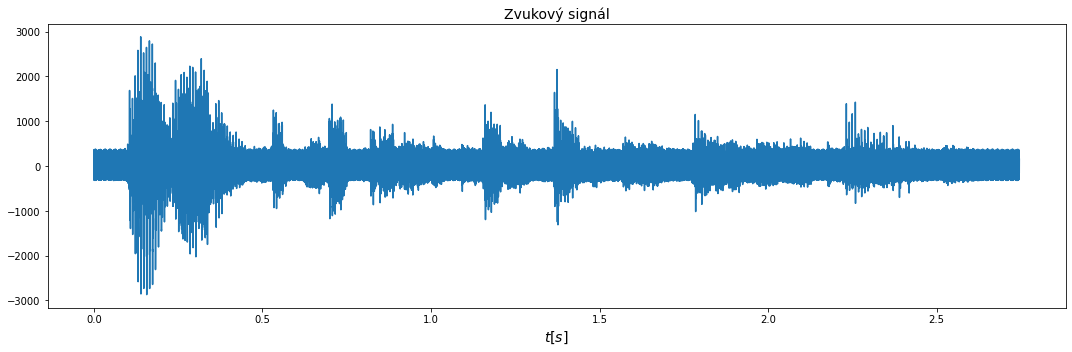

In [3]:
# Uloha 4.1
sampleRate, s = wavfile.read("../audio/xkrama06.wav")
len_frames = s.size
len_seconds = len_frames / sampleRate
s_min = np.min(s)
s_max = np.max(s)

print(f"Dlzka vo vzorkach: {len_frames}")
print(f"Dlzka v sekundach: {len_seconds}")
print(f"Minimalna hodnota: {s_min}")
print(f"Maximalna hodnota: {s_max}")

t = np.linspace(0, len_seconds, num=len_frames)
plt.figure(figsize=(15,5)) 
plt.plot(t, s)
plt.title('Zvukový signál', fontsize=14)
plt.xlabel('$t[s]$', fontsize=14)
plt.tight_layout()

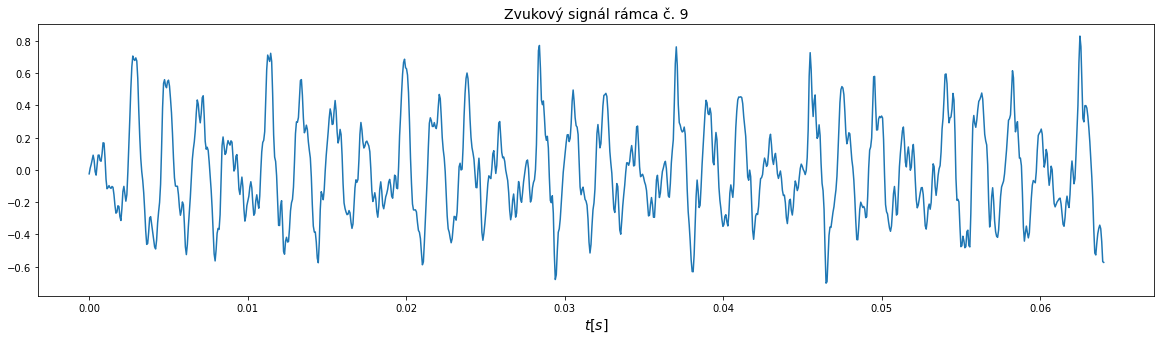

In [4]:
# Uloha 4.2
s = s - np.mean(s)
s = s / np.abs(s).max()

s_frames = []
n_of_frames = len_frames//1024
for i in range(n_of_frames * 2):
    s_frames.append(s[i*512 : i*512 + 1024])

t = np.linspace(0, 1024 / sampleRate, num=1024)
plt.figure(figsize=(20,5)) 
plt.plot(t, s_frames[8])
plt.title('Zvukový signál rámca č. 9', fontsize=14)
plt.xlabel('$t[s]$', fontsize=14)
plt.show()

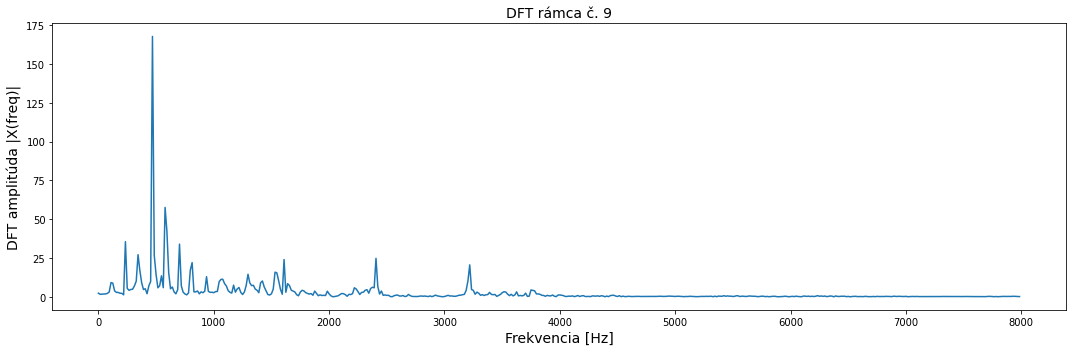

In [5]:
# Uloha 4.3
X = dft(s_frames[8])
n = np.arange(X.size)

plt.figure(figsize=(15, 5))
plt.plot(n[:X.size//2] * (sampleRate / X.size), np.abs(X[:X.size//2]))
plt.title('DFT rámca č. 9', fontsize=14)
plt.xlabel('Frekvencia [Hz]', fontsize=14)
plt.ylabel('DFT amplitúda |X(freq)|', fontsize=14)
plt.tight_layout()

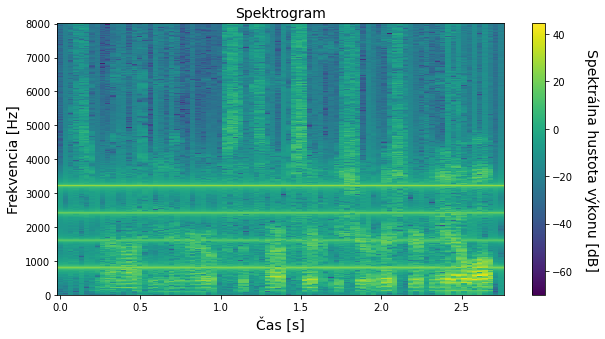

In [6]:
# Uloha 4.4
frames_dft_log = [(10 * np.log10(np.abs(dft(x))[:512] ** 2)) for x in s_frames]

plt.figure(figsize=(10, 5))
f = np.linspace(0, len_seconds, len(frames_dft_log))
t = np.linspace(0, 8000, len(frames_dft_log[0]))
plt.pcolormesh(f, t, np.rot90(frames_dft_log,3)) 
plt.title('Spektrogram', fontsize=14)
plt.xlabel('Čas [s]', fontsize=14)
plt.ylabel('Frekvencia [Hz]', fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Spektrálna hustota výkonu [dB]', rotation=270, labelpad=25, fontsize=14)
plt.show()

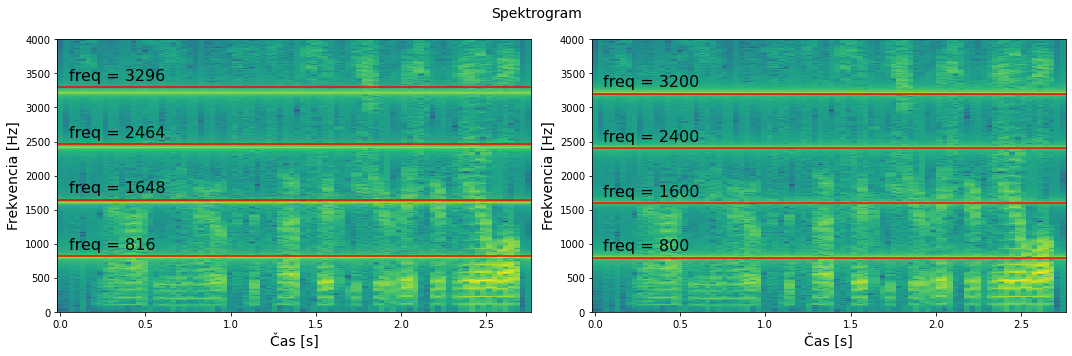

In [7]:
#Uloha 4.5 (pomocou funkcie)
freq_peaks = signal.find_peaks(frames_dft_log[0], height=20)[0]
fig = plt.figure(figsize=(15, 5))

f = np.linspace(0, len_seconds, len(frames_dft_log))
t = np.linspace(0, 8000, len(frames_dft_log[0]))

a = plt.subplot(121)
a.pcolormesh(f, t, np.rot90(frames_dft_log,3))  
for x in freq_peaks:
    a.axhline(y=x*16, color='r')
    a.text(0.05, x*16+100, f'freq = {x*16}', fontsize=16)
a.set_xlabel('Čas [s]', fontsize=14)
a.set_ylabel('Frekvencia [Hz]', fontsize=14)
a.set_ylim(0, 4000)

#Uloha 4.5 (odcitanie z grafu)
b = plt.subplot(122)
b.pcolormesh(f, t, np.rot90(frames_dft_log,3)) 
for x in range(1,5):
    b.axhline(y=x*800, color='red')
    b.text(0.05, x*800 + 100, f'freq = {x*800}', fontsize=16)
b.set_xlabel('Čas [s]', fontsize=14)
b.set_ylabel('Frekvencia [Hz]', fontsize=14)
b.set_ylim(0, 4000)

fig.suptitle('Spektrogram', fontsize=14)
plt.tight_layout()

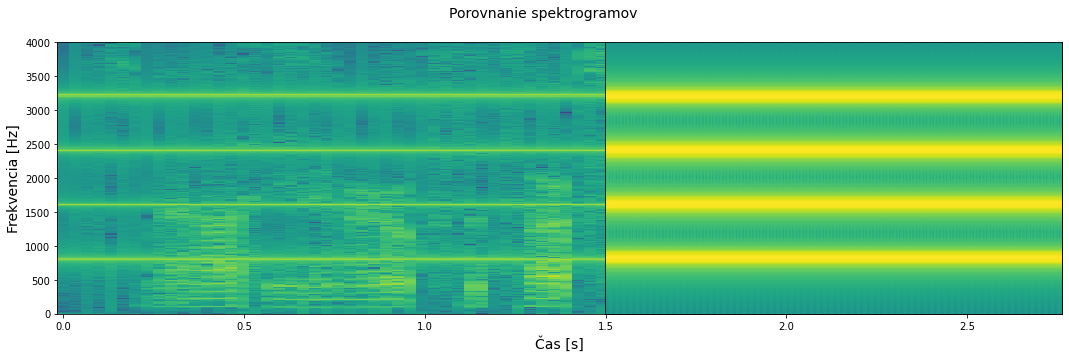

In [8]:
# Uloha 4.6
fq = 800
t = np.linspace(0, len_seconds, len_frames)
noise = 0
for x in range(1,5):
    noise += np.cos(fq * x * 2 * np.pi * t)

wavfile.write('../audio/4cos.wav', sampleRate, noise)

fig = plt.figure(figsize=(18, 5))
f = np.linspace(0, len_seconds, len(frames_dft_log))
t = np.linspace(0, 8000, len(frames_dft_log[0]))
b = plt.pcolormesh(f, t, np.rot90(frames_dft_log,3)) 
plt.ylim(ymax=4000)

plt.xlabel('Čas [s]', fontsize=14)
plt.ylabel('Frekvencia [Hz]', fontsize=14)

insert = fig.add_subplot(122)
insert.axes.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
a = insert.specgram(noise)
insert.set_ylim([0,0.5])

fig.suptitle('Porovnanie spektrogramov', fontsize=14)

plt.show()


Koeficienty filtru 1
b = 0.9376659672932826, -7.134324696969703, 24.106495792741207, -47.21620244821185, 58.61281672986276, -47.21620244821187, 24.10649579274122, -7.134324696969707, 0.9376659672932834
a = 1.0, -7.486194651568064, 24.88927933395864, -47.968394019418064, 58.594877927991284, -46.449231776622746, 23.33776552176166, -6.797233842754276, 0.8792174662201675

Koeficienty filtru 2
b = 0.9365192092192571, -6.061406027422333, 18.457725034101873, -34.05384684128202, 41.46194517787623, -34.05384684128202, 18.45772503410187, -6.061406027422333, 0.9365192092192571
a = 1.0, -6.366167983983941, 19.068250334224395, -34.60554570722893, 41.447369666071125, -33.48910936781583, 17.857745434986157, -5.769682678379991, 0.8770682292368006

Koeficienty filtru 3
b = 0.9360530889741969, -4.401694351580104, 11.506157188253248, -19.288375610169574, 22.928087192525368, -19.28837561016957, 11.506157188253242, -4.401694351580101, 0.936053088974196
a = 1.0, -4.624724658045192, 11.889116448215253, -19.6

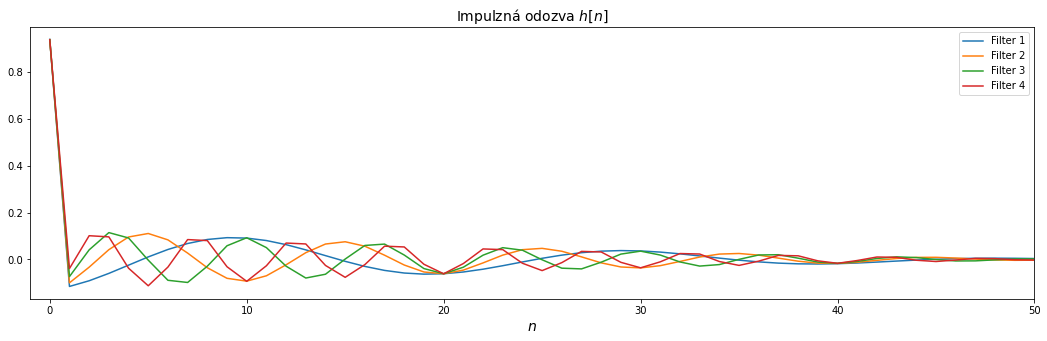

In [19]:
# Uloha 4.7
filters = [makeButter(x) for x in [800, 1600, 2400, 3200]]
for i in range(len(filters)):
    coeffs = signal.sos2tf(filters[i])
    print(f'Koeficienty filtru {i + 1}')
    print('b = ', end='')
    print(', '.join( [str(x) for x in coeffs[0]]))
    print('a = ', end='')
    print(', '.join( [str(x) for x in coeffs[1]]), end='\n\n')
    

dimp = [1.0, *np.zeros(len_frames-1)]
dimp_filter = [signal.sosfilt(x, dimp) for x in filters]

plt.figure(figsize=(18,5))

for i in range(len(dimp_filter)):
    plt.plot(np.arange(dimp_filter[i].size), dimp_filter[i], label=f'Filter {i + 1}')
plt.legend()

    
plt.title('Impulzná odozva $h[n]$', fontsize=14)
plt.xlabel('$n$', fontsize=14)
plt.xlim(-1,50)
plt.show()

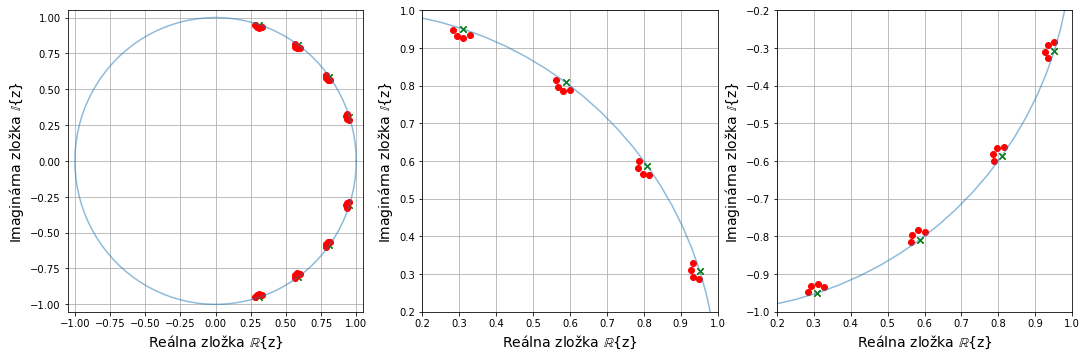

In [10]:
# Uloha 4.8
z_arr, p_arr = [], []
for x in filters:
    z, p, _ = signal.sos2zpk(x)
    z_arr.append(z)
    p_arr.append(p)

plt.figure(figsize=(18,5.54))
t = np.linspace(0, np.pi *2,101)

plt.plot(np.cos(t),np.sin(t), alpha=0.5)

z_p_graphs = [[131, [-1.05, 1.05, -1.05, 1.05]],
                      [132, [0.2, 1, 0.2, 1]],
                      [133, [0.2, 1, -1, -0.2]]]

i = 0
for g in z_p_graphs:
    plt.subplot(g[0])
    plt.plot(np.real(z_arr), np.imag(z_arr), 'xg', label='zeros')
    plt.plot(np.real(p_arr), np.imag(p_arr), 'or', label='poles')
    plt.xlabel('Reálna zložka $\mathbb{R}\{$z$\}$', fontsize=14)
    plt.ylabel('Imaginárna zložka $\mathbb{I}\{$z$\}$', fontsize=14)
    plt.plot(np.cos(t),np.sin(t), alpha=0.5)
    plt.axis(g[1])
    i += 1
    
    plt.grid()

plt.show()

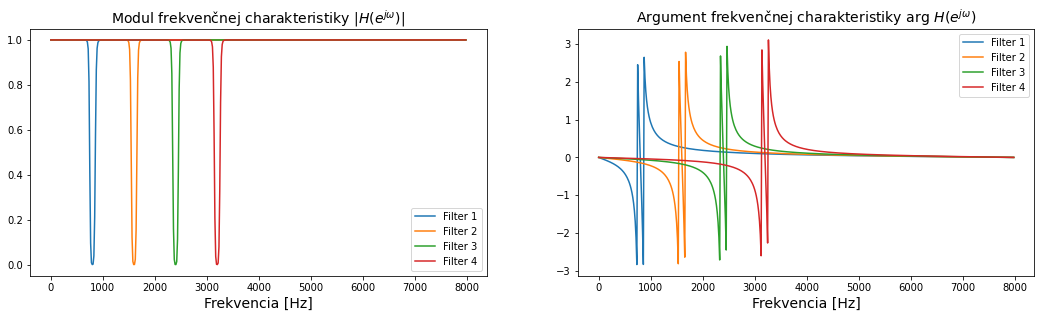

In [11]:
# Uloha 4.9
plt.figure(figsize=(18,10))
a = plt.subplot(221)
b = plt.subplot(222)
nyq = sampleRate * 0.5

for i in range(len(filters)):
    w, h = signal.sosfreqz(filters[i])

    a.plot((nyq / np.pi) * w, np.abs(h), label=f'Filter {i + 1}')
    b.plot((nyq / np.pi) * w, np.angle(h), label=f'Filter {i + 1}')

a.set_xlabel('Frekvencia [Hz]', fontsize=14)
a.set_title('Modul frekvenčnej charakteristiky $|H(e^{j\omega})|$', fontsize=14)
a.legend()

b.set_xlabel('Frekvencia [Hz]', fontsize=14)
b.set_title('Argument frekvenčnej charakteristiky $\mathrm{arg}\ H(e^{j\omega})$', fontsize=14)
b.legend()
plt.show()

In [12]:
# Uloha 4.10
filtered_sound = s

for x in filters:
    filtered_sound = signal.sosfilt(x, filtered_sound)

if np.all(np.abs(filtered_sound) < 1):
    wavfile.write('../audio/clean_bandstop.wav', sampleRate, filtered_sound)